<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

# <font color=limegreen>Acquire Data for Classification</font>

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

# Big Ideas

- Cache your data to speed up your data acquisition.

- Helper functions are your friends.

# Objectives 

**By the end of the acquire lesson and exercises, you will be able to...**

- **read data into a pandas DataFrame using the following modules:**

>pydataset
    
```python
from pydataset import data
df = data('dataset_name')
```
>seaborn datasets
    
```python
import seaborn as sns
df = sns.load_dataset('dataset_name')
```

- **read data into a pandas DataFrame from the following sources:**

    - an Excel spreadsheet

    - a Google sheet
    
    - Codeup's mySQL database

```python
pd.read_excel('file_name.xlsx', sheet_name='sheet_name')
pd.read_csv('filename.csv')
pd.read_sql(sql_query, connection_url)
```

- **use pandas methods and attributes to do some initial summarization and exploration of your data.**

```python
.head()
.shape
.info()
.columns
.dtypes
.describe()
.value_counts()
```

- **create functions that acquire data from Codeup's database, save the data locally to CSV files (cache your data), and check for CSV files upon subsequent use.**


- **create a new python module, `acquire.py`, that holds your functions that acquire the titanic and iris data and can be imported and called in other notebooks and scripts.**

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

In [12]:
import pandas as pd
import numpy as np
import os

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## 1. Create `df_iris`

- Use a python module (pydata or seaborn datasets) containing datasets as a source for the iris data.

**Other Seaborn Datasets you can use are linked [here](https://github.com/mwaskom/seaborn-data)**

In [13]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [14]:
df_iris = data('iris')

___

### Print the first 3 rows.

In [15]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


___

### Print the number of rows and columns (shape).

In [16]:
df_iris.shape

(150, 5)

___

### Print the column names.

In [17]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [18]:
# Return a nice list of columns if I want to grab and use them later.

df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

___

### Print the data type of each column.

In [19]:
# Return just data types.

df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [20]:
# Return data types plus.

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


___

### Print the summary statistics for each of the numeric variables. 

- Would you recommend rescaling the data based on these statistics?

>All of the numeric variables in the iris dataset are in the same unit of measure, cm, so I don't see a need to scale them.

>IF there were a very large range in our feature values, even though they were measured in the same units, it might be beneficial to scale our data since a number of machine learning algorithms use a distance metric to weight feature importance.

In [21]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


___

In [22]:
stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]

,mean,50%,std,range
Sepal.Length,5.843333,5.80,0.828066,3.6
Sepal.Width,3.057333,3.00,0.435866,2.4
Petal.Length,3.758000,4.35,1.765298,5.9
Petal.Width,1.199333,1.30,0.762238,2.4


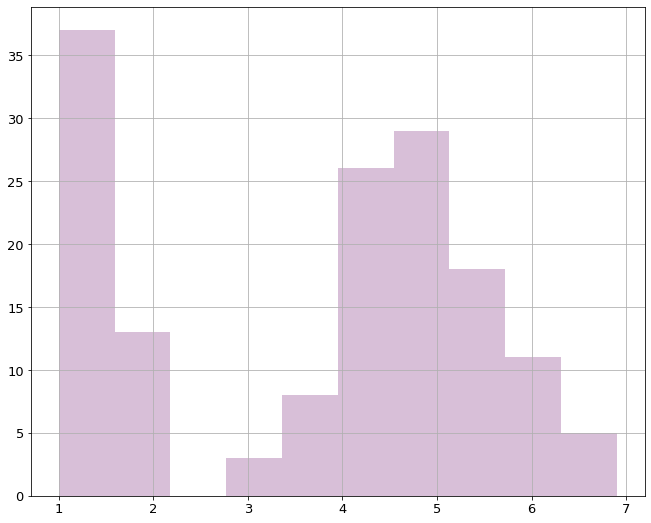

In [23]:
# I can do a quick visual of the variable distributions if I want.

df_iris['Petal.Length'].hist(color='thistle')

plt.show()

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## 2. Create `df_excel`

- Read the sheet `Table1_CustDetails` from the excel workbook `Spreadsheets_Exercises.xlsx` into a dataframe `df_excel`.

(Your workbook name may differ from mine.)

In [29]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [30]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


**<font color=purple>I'm going to take care of these categorical variables with numeric data types right now. This will make the rest easier.</font>**

In [28]:
df_excel = df_excel.astype({"is_senior_citizen": "object", "phone_service": "object", 
         "internet_service": "object", "contract_type": "object"})

df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   object 
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   object 
 6   internet_service   7049 non-null   object 
 7   contract_type      7049 non-null   object 
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  tenure             7049 non-null   float64
 12  churn              7049 non-null   object 
 13  Unnamed: 13        0 non-null      float64
 14  phone_service.1    78 non-null     object 
 15  (Multiple Items)   1 non-null      object 
dtypes: float64(4), object(12

___

### Assign the first 100 rows to a new dataframe, `df_excel_sample`.

In [16]:
df_excel_sample = df_excel.head(100)

In [17]:
df_excel_sample.shape

(100, 12)

___

### Print the number of rows of your original dataframe.

In [18]:
df_excel.shape[0]

7049

___

### Print the first 5 column names.

In [19]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

___

### Print the column names that have a data type of object.

In [20]:
df_excel.select_dtypes(include='object').head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,Yes


In [21]:
df_excel.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'churn'],
      dtype='object')

___

### Compute the range for each of the numeric variables.

- I can choose to look just at the numeric variables quickly like this. If I was going forward with this DataFrame, I would change the data types of numeric categoricals to object data types. I'll wait and do this below with the DataFrames I will use going forward.

In [22]:
telco_stats = df_excel.describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [23]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## 3. Create `df_google` 

- Read the data from a Google sheet into a dataframe, df_google.

[use this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357)

In [24]:
# Grab the Google sheet url.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [26]:
# Turn Google sheet address into a CSV export URL.

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [27]:
# Read in the data using the pandas `pd.read_csv()` function.

df_google = pd.read_csv(csv_export_url)

### Print the first 3 rows.

In [28]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


___

### Print the number of rows and columns.

In [29]:
df_google.shape

(891, 12)

___

### Print the column names.

In [30]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

___

### Print the data type of each column.

- Again, there are numeric data types here that are really categorical variables, so I'll take care of them right here.

In [31]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df_google = df_google.astype({'PassengerId': 'object', 'Survived': 'object', 'Pclass': 'object'})
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


___

### Print the summary statistics for each of the numeric variables.

- Some of these numeric columns are really categorical values, and I can make that change here if I want. I could also just note this observation and take care of this when I prepare my data.

In [34]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


___

### Print the unique values for each of your categorical variables.

- Some of these categorical variable columns have a ton of unique values, so I'll check the number first. If I want to see the unique values, I can do a `.value_counts()` on individual columns.


In [35]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

PassengerId has 891 unique values.
Survived has 2 unique values.
Pclass has 3 unique values.
Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [36]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [37]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [39]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## `acquire.py` Functions

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [41]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [42]:
def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df

In [43]:
def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in titanic df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('titanic_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv file.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    return df

In [46]:
titanic_df = get_titanic_data(cached=False)

In [47]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

2. Make a function named `get_iris_data` that returns the data from the iris_db on the codeup data science database as a pandas DataFrame. The returned DataFrame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [49]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [48]:
def get_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in iris df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('iris_df.csv') == False:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    return df

In [50]:
iris_df = get_iris_data(cached=False)

In [51]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


**I'm going to test these in a new notebook by importing functions from my `e_class_acquire.py` module. Once I know they read my data into pandas DataFrames, I'm ready to clean and prep my data.**